In [ ]:
!git clone https://github.com/alneremin/lung-cancer-diagnosis.git

Cloning into 'lung-cancer-diagnosis'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 95 (delta 36), reused 78 (delta 21), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [ ]:
!git -C lung-cancer-diagnosis checkout develop

Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'


In [ ]:
import sys
import os

sys.path.insert(0, os.path.join("lung-cancer-diagnosis","src"))
!pip install pydicom SimpleITK

In [ ]:
!rm -r /content/lung-cancer-diagnosis/src/downloads

In [ ]:
import sys
sys.path.remove("lung-cancer-diagnosis/src")

In [ ]:
import os

path_to_dataset = "/content/lung-cancer-diagnosis/src/downloads/Lung-PET-CT-Dx"
if not os.path.exists(path_to_dataset):
  os.makedirs(path_to_dataset)
!cp -r /content/drive/MyDrive/Lung-PET-CT-Dx-All/* /content/lung-cancer-diagnosis/src/downloads/Lung-PET-CT-Dx

In [9]:
import load_data
from importlib import reload
import os
import sys
import TCIA.tciaclientimpl as tciaclientimpl


classfile = os.path.join(sys.path[0], "VisualizationTools","category.txt")
annotation_path = os.path.join(sys.path[0], "downloads", "Annotation")
path_to_download = os.path.join("drive","MyDrive","Lung-PET-CT-Dx-All")

load_data.download_data(classfile, annotation_path, path_to_download, 250)

https://services.cancerimagingarchive.net/services/v3/TCIA/query/getPatient?Collection=Lung-PET-CT-Dx&format=json

Query TCIA - getPatient(Lung-PET-CT-Dx, JSON)
patient_xml Lung_Dx-A0251 not found


In [ ]:
!cp -r /content/lung-cancer-diagnosis/src/downloads/Lung-PET-CT-Dx/* /content/drive/MyDrive/Lung-PET-CT-Dx-All

In [ ]:
# thank you https://github.com/1297rohit/VGG16-In-Keras

In [ ]:
import keras,os
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
directory = os.path.join("lung-cancer-diagnosis","src", "downloads", "Lung-PET-CT-Dx")

trdata = ImageDataGenerator()
directory_train = os.path.join(directory, "train")
traindata = trdata.flow_from_directory(directory=directory_train,target_size=(224,224))

tsdata = ImageDataGenerator()
directory_test = os.path.join(directory, "test")
testdata = tsdata.flow_from_directory(directory=directory_test,target_size=(224,224))


Found 512 images belonging to 4 classes.
Found 110 images belonging to 4 classes.


In [ ]:
# вычислим кол-во шагов исходя из кол-ва данных при условии, что batch_size=32
steps_per_epoch = len(traindata.filenames) // 32
validation_steps = len(testdata.filenames) // 32

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor=metric, verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor=metric, min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
hist = model.fit_generator(steps_per_epoch=steps_per_epoch,generator=traindata, validation_data=testdata, validation_steps=validation_steps,epochs=50)#,callbacks=[checkpoint,early])
model.save('vgg16_mia_model.h5')
!cp vgg16_mia_model.h5 "/content/drive/MyDrive/vgg16_mia_model.h5"

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
 2/16 [==>...........................] - ETA: 13:25 - loss: 9.6122e-05 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
!cp -r /content/lung-cancer-diagnosis/src/downloads/Lung-PET-CT-Dx "/content/drive/MyDrive/Lung-PET-CT-Dx"

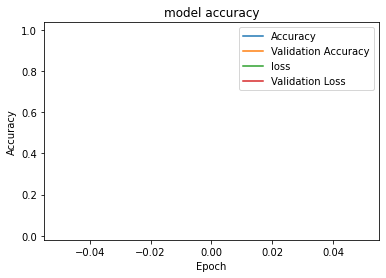

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

[0, 0, 1, 0]


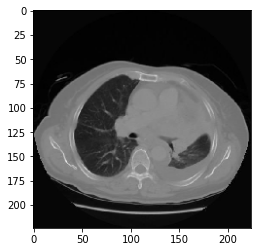

In [ ]:
from keras.preprocessing import image
img_path = os.path.join(directory_test, "E", "Lung_Dx-E0005", "000008.jpg")
img = image.load_img(img_path,target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
#from keras.models import load_model
#saved_model = load_model("vgg16_1.h5")
output = model.predict(img)
print([round(i) for i in output[0]])

Дообучение обученной сети 

In [ ]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

In [ ]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False
X= vggmodel.layers[-2].output
predictions = Dense(4, activation="softmax")(X)
model_final = Model(vggmodel.input, predictions)

In [ ]:
directory2 = os.path.join("drive","MyDrive", "Lung-PET-CT-Dx")

trdata2 = ImageDataGenerator()
directory2_train = os.path.join(directory2, "train")
traindata2 = trdata2.flow_from_directory(directory=directory2_train,target_size=(224,224))

tsdata2 = ImageDataGenerator()
directory2_test = os.path.join(directory2, "test")
testdata2 = tsdata2.flow_from_directory(directory=directory2_test,target_size=(224,224))

Found 512 images belonging to 4 classes.
Found 110 images belonging to 4 classes.


In [ ]:
steps_per_epoch2 = len(traindata2.filenames) // 32
validation_steps2 = len(testdata2.filenames) // 32

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)
model_final.compile(optimizer=opt, 
                    loss=keras.losses.categorical_crossentropy, 
                    metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("vgg16_mia_model_final.h5", monitor=metric, verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor=metric, min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
hist2 = model_final.fit_generator(steps_per_epoch=steps_per_epoch2,generator=traindata2, validation_data=testdata2, validation_steps=validation_steps2,epochs=20,callbacks=[checkpoint,early])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
16/16 [==============================] - 314s 20s/step - loss: 2.2764 - accuracy: 0.6143 - val_loss: 2.2584 - val_accuracy: 0.4792

Epoch 00001: val_accuracy improved from -inf to 0.47917, saving model to vgg16_mia_model_final.h5
Epoch 2/20
16/16 [==============================] - 312s 20s/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 2.7250 - val_accuracy: 0.5312

Epoch 00002: val_accuracy improved from 0.47917 to 0.53125, saving model to vgg16_mia_model_final.h5
Epoch 3/20
16/16 [==============================] - 311s 20s/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 5.8457 - val_accuracy: 0.4271

Epoch 00003: val_accuracy did not improve from 0.53125
Epoch 4/20
16/16 [==============================] - 311s 20s/step - loss: 0.0026 - accuracy: 0.9980 - val_loss: 6.4594 - val_accuracy: 0.2396

Epoch 00004: val_accuracy did not improve from 0.53125
Epoch 5/20
16/16 [==============================] - 311s 20s/step - loss: 0.0043 - accuracy: 0.9979 - val_loss: 6.7821 

In [ ]:
!cp vgg16_mia_model_final.h5 "/content/drive/MyDrive/vgg16_mia_model_final.h5"

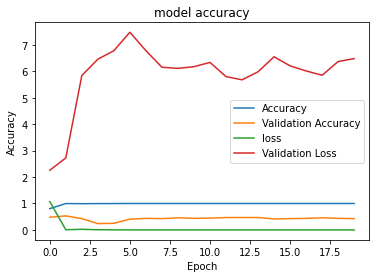

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist2.history["accuracy"])
plt.plot(hist2.history['val_accuracy'])
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

##########

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/VGG16.ipynb" /content/lung-cancer-diagnosis/VGG16.ipynb

Git commands

In [ ]:
!git -C lung-cancer-diagnosis status

On branch develop
Your branch is up to date with 'origin/develop'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   src/load_data.py

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git -C lung-cancer-diagnosis add .

In [ ]:
!git -C lung-cancer-diagnosis commit -m "fixed download errors" -m "an error related to processing data from xml and an error loading multiple StudyInstanceUIDs for one patient"

[develop 0581a5b] fixed download errors
 5 files changed, 49 insertions(+), 28 deletions(-)
 rewrite VGG16.ipynb (90%)


In [ ]:
!git -C lung-cancer-diagnosis config --global user.email "alneremin@ya.ru"
!git -C lung-cancer-diagnosis config --global user.name "alneremin"

In [ ]:
!git -C lung-cancer-diagnosis push origin develop

Counting objects: 10, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (10/10), done.
Writing objects: 100% (10/10), 107.41 KiB | 5.11 MiB/s, done.
Total 10 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 6 local objects.
To https://github.com/alneremin/lung-cancer-diagnosis.git
   80b64a8..0581a5b  develop -> develop
